<a href="https://colab.research.google.com/github/SnehaDharne/GDM-diagnosis/blob/main/RandomForestIterativeImputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='/content/drive/MyDrive/datasets for colab/pima-indians-diabetes.csv'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv(path)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# make age category column which will help age-appropriate in filling values which are 0
df['age_category'] = pd.cut(df['Age'], bins=[0, 21, 31, 41, 51, 61, 71, 81, np.inf], labels=[1,2,3,4,5,6,7,8])
df['age_category'] = df['age_category'].astype(int)
agecat = [1,2,3,4,5,6,7,8]

In [ ]:
pip install IterativeImputer


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement IterativeImputer (from versions: none)
ERROR: No matching distribution found for IterativeImputer


Iterative Imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(df)
x=imp_mean.transform(df)
#df_temp_knn = pd.DataFrame(imputed_data)
df_temp = pd.DataFrame(x)
#df_temp_knn.columns = df.columns
df_temp

,0,1,2,3,4,5,6,7,8,9
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,4.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,2.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,3.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,1.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0,6.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0,2.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0,2.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0,4.0


In [ ]:
df_temp.rename(columns = {0:'Pregnancies', 1:'GLucose',
                              2:'BloodPressure', 3:'SkinThickness', 4: 'Insulin', 5: 'BMI',6:'DiabetesPedigreeFunction',7:'Age',8:'Outcome',9:'Age_category'}, inplace = True)

In [ ]:
df_temp

,Pregnancies,GLucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_category
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,4.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,2.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,3.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,1.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0,6.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0,2.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0,2.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0,4.0


In [ ]:
from scipy import stats
import numpy as np
z= np.abs(stats.zscore(df))
print(z)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270  0.692891  0.204013   
1       0.844885  1.123396       0.160546       0.530902  0.692891  0.684422   
2       1.233880  1.943724       0.263941       1.288212  0.692891  1.103255   
3       0.844885  0.998208       0.160546       0.154533  0.123302  0.494043   
4       1.141852  0.504055       1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813  0.622642       0.356432       1.722735  0.870031  0.115169   
764     0.547919  0.034598       0.046245       0.405445  0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594  0.735190   
766     0.844885  0.159787       0.470732       1.288212  0.692891  0.240205   
767     0.844885  0.873019       0.046245       0.656358  0.692891  0.202129   

     DiabetesPedigreeFunction       Age

In [ ]:
threshold = 3
print(np.where(z>3))

(array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
        78,  81,  81,  88, 111, 123, 145, 153, 159, 172, 177, 182, 186,
       193, 220, 222, 228, 228, 247, 261, 266, 269, 286, 298, 300, 330,
       332, 336, 342, 347, 349, 357, 370, 370, 371, 371, 395, 409, 415,
       426, 426, 430, 435, 445, 445, 453, 453, 453, 455, 459, 459, 468,
       484, 486, 494, 494, 502, 522, 522, 533, 535, 579, 584, 589, 593,
       601, 604, 619, 621, 643, 645, 655, 666, 673, 684, 684, 695, 697,
       703, 706, 706, 753]), array([6, 2, 4, 5, 4, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 0, 4, 7, 5, 4, 0,
       2, 5, 1, 4, 2, 4, 2, 4, 6, 4, 2, 2, 2, 4, 0, 2, 6, 2, 2, 1, 2, 1,
       2, 4, 6, 5, 6, 6, 4, 4, 2, 5, 2, 2, 5, 6, 2, 7, 9, 0, 7, 9, 2, 2,
       4, 2, 5, 1, 2, 5, 2, 2, 3, 4, 2, 6, 2, 2, 2, 6, 2, 4, 4, 7, 5, 5,
       7, 4, 2, 2, 2, 5, 4]))


In [ ]:
df = df[(z < 3).all(axis=1)]

In [ ]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr= q3-q1
print(iqr)

Pregnancies                   5.0000
Glucose                      40.0000
BloodPressure                16.0000
SkinThickness                32.0000
Insulin                     126.0000
BMI                           8.9000
DiabetesPedigreeFunction      0.3605
Age                          16.0000
Outcome                       1.0000
age_category                  1.0000
dtype: float64


In [ ]:
df = df[~((df <(q1 - 1.5 * iqr))|(df>(q3+1.5*iqr))).any(axis=1)]
df.shape

(575, 10)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_category
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.00000,575.000000,575.000000,575.000000,575.000000
mean,3.582609,117.017391,71.339130,21.151304,66.257391,32.04887,0.422894,30.335652,0.297391,2.400000
std,3.156716,28.248148,10.955633,15.085230,77.207399,6.39927,0.239565,8.320059,0.457508,0.841021
min,0.000000,44.000000,44.000000,0.000000,0.000000,18.20000,0.078000,21.000000,0.000000,1.000000
25%,1.000000,97.000000,64.000000,0.000000,0.000000,27.40000,0.244000,23.000000,0.000000,2.000000
50%,3.000000,112.000000,70.000000,23.000000,45.000000,32.00000,0.361000,28.000000,0.000000,2.000000
75%,6.000000,132.000000,78.000000,32.000000,120.000000,36.05000,0.575500,37.000000,1.000000,3.000000
max,13.000000,198.000000,104.000000,60.000000,310.000000,49.60000,1.144000,51.000000,1.000000,4.000000


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features ='sqrt')
rf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=300)

In [ ]:
y_pred =rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, classification_report
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
model_mse = mean_squared_error(y_pred, y_test)
print(model_mse)
print(classification_report(y_test, y_pred))

[[74  7]
 [17 17]]
Accuracy: 0.7913043478260869
0.20869565217391303
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        81
           1       0.71      0.50      0.59        34

    accuracy                           0.79       115
   macro avg       0.76      0.71      0.72       115
weighted avg       0.78      0.79      0.78       115



Variable: Glucose              Importance: 0.26
Variable: BMI                  Importance: 0.14
Variable: Age                  Importance: 0.14
Variable: DiabetesPedigreeFunction Importance: 0.12
Variable: Pregnancies          Importance: 0.09
Variable: BloodPressure        Importance: 0.09
Variable: Insulin              Importance: 0.08
Variable: SkinThickness        Importance: 0.07


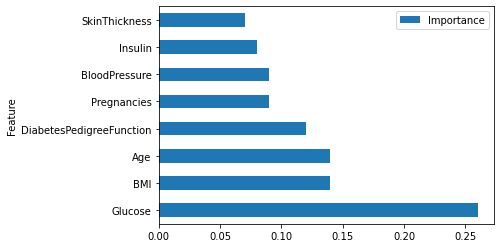

In [ ]:
df1=df.drop('Outcome',axis=1)
df1_list= list(df.columns)
df2=np.array(df1)i
import matplotlib.pyplot as plt
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(df2, round(importance, 2)) for df2, importance in zip(df1_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

feature_importance = pd.DataFrame(feature_importances, columns =['Feature', 'Importance'])
ax = feature_importance.plot.barh(x='Feature', y='Importance')
plt.show()

KNN Imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(df)
x=imp_mean.transform(df)
#df_temp_knn = pd.DataFrame(imputed_data)
df_temp = pd.DataFrame(x)
#df_temp_knn.columns = df.columns
df_temp

,0,1,2,3,4,5,6,7,8,9
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,4.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,2.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,3.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,1.0
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
570,9.0,89.0,62.0,0.0,0.0,22.5,0.142,33.0,0.0,3.0
571,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0,2.0
572,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0,2.0
573,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0,4.0


In [ ]:
df_temp.rename(columns = {0:'Pregnancies', 1:'GLucose',
                              2:'BloodPressure', 3:'SkinThickness', 4: 'Insulin', 5: 'BMI',6:'DiabetesPedigreeFunction',7:'Age',8:'Outcome',9:'Age_category'}, inplace = True)

In [ ]:
df=pd.read_csv(path)
# make age category column which will help age-appropriate in filling values which are 0
df['age_category'] = pd.cut(df['Age'], bins=[0, 21, 31, 41, 51, 61, 71, 81, np.inf], labels=[1,2,3,4,5,6,7,8])
df['age_category'] = df['age_category'].astype(int)
agecat = [1,2,3,4,5,6,7,8]


from sklearn.impute import KNNImputer
imp_mean = KNNImputer()
imp_mean.fit(df)
x=imp_mean.transform(df)
df_temp = pd.DataFrame(x)
#df_temp_knn.columns = df.columns
df_temp

df_temp.rename(columns = {0:'Pregnancies', 1:'GLucose',
                              2:'BloodPressure', 3:'SkinThickness', 4: 'Insulin', 5: 'BMI',6:'DiabetesPedigreeFunction',7:'Age',8:'Outcome',9:'Age_category'}, inplace = True)

from scipy import stats
import numpy as np
z= np.abs(stats.zscore(df))

threshold = 3

df = df[(z < 3).all(axis=1)]

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr= q3-q1

print(iqr)

Pregnancies                   5.0000
Glucose                      40.0000
BloodPressure                16.0000
SkinThickness                32.0000
Insulin                     126.0000
BMI                           8.9000
DiabetesPedigreeFunction      0.3605
Age                          16.0000
Outcome                       1.0000
age_category                  1.0000
dtype: float64


In [ ]:
df = df[~((df <(q1 - 1.5 * iqr))|(df>(q3+1.5*iqr))).any(axis=1)]
df.shape

(575, 10)

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features ='sqrt')
#rf.fit(X_train, y_train)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
y_pred =lr.predict(X_test)

y_pred


array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
model_mse = mean_squared_error(y_pred, y_test)
print(model_mse)

[[74  7]
 [15 19]]
Accuracy: 0.808695652173913
0.19130434782608696


Variable: Glucose              Importance: 0.26
Variable: BMI                  Importance: 0.16
Variable: DiabetesPedigreeFunction Importance: 0.13
Variable: Age                  Importance: 0.13
Variable: Pregnancies          Importance: 0.09
Variable: BloodPressure        Importance: 0.08
Variable: SkinThickness        Importance: 0.06
Variable: Insulin              Importance: 0.06
Variable: Outcome              Importance: 0.04


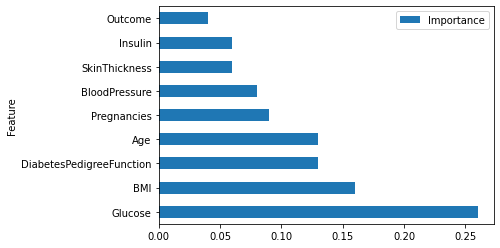

In [ ]:
import matplotlib.pyplot as plt
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(df2, round(importance, 2)) for df2, importance in zip(df1_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

feature_importance = pd.DataFrame(feature_importances, columns =['Feature', 'Importance'])
ax = feature_importance.plot.barh(x='Feature', y='Importance')
plt.show()

DROP

In [ ]:
df=pd.read_csv(path)
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI','Insulin']
for feature in features:
  df = df[df[feature] != 0]

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df=pd.read_csv(path)

features = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI','Insulin']
for feature in features:
  df = df[df[feature] != 0]




from scipy import stats
import numpy as np
z= np.abs(stats.zscore(df))

threshold = 3

df = df[(z < 3).all(axis=1)]

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr= q3-q1


df = df[~((df <(q1 - 1.5 * iqr))|(df>(q3+1.5*iqr))).any(axis=1)]

from sklearn.model_selection import train_test_split
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features ='sqrt')
rf.fit(X_train, y_train)

y_pred =rf.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
from sklearn.metrics import mean_squared_error
model_mse = mean_squared_error(y_pred, y_test)
print(model_mse)

[[44  3]
 [ 9  9]]
Accuracy: 0.8153846153846154
0.18461538461538463


Variable: Glucose              Importance: 0.24
Variable: Insulin              Importance: 0.16
Variable: Age                  Importance: 0.16
Variable: BMI                  Importance: 0.11
Variable: DiabetesPedigreeFunction Importance: 0.1
Variable: Pregnancies          Importance: 0.08
Variable: BloodPressure        Importance: 0.08
Variable: SkinThickness        Importance: 0.07


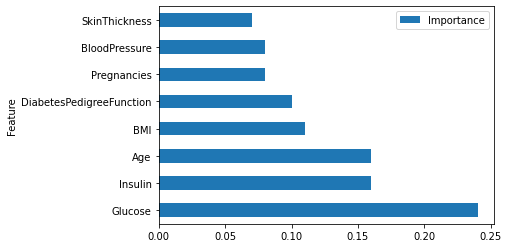

In [ ]:
import matplotlib.pyplot as plt
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(df2, round(importance, 2)) for df2, importance in zip(df1_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

feature_importance = pd.DataFrame(feature_importances, columns =['Feature', 'Importance'])
ax = feature_importance.plot.barh(x='Feature', y='Importance')
plt.show()

IMPUTE

In [ ]:
df=pd.read_csv(path)

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.0000,0.1295,0.1413,-0.0817,-0.0735,0.0177,-0.0335,0.5443,0.2219
Glucose,0.1295,1.0000,0.1526,0.0573,0.3314,0.2211,0.1373,0.2635,0.4666
BloodPressure,0.1413,0.1526,1.0000,0.2074,0.0889,0.2818,0.0413,0.2395,0.0651
SkinThickness,-0.0817,0.0573,0.2074,1.0000,0.4368,0.3926,0.1839,-0.1140,0.0748
Insulin,-0.0735,0.3314,0.0889,0.4368,1.0000,0.1979,0.1851,-0.0422,0.1305
BMI,0.0177,0.2211,0.2818,0.3926,0.1979,1.0000,0.1406,0.0362,0.2927
DiabetesPedigreeFunction,-0.0335,0.1373,0.0413,0.1839,0.1851,0.1406,1.0000,0.0336,0.1738
Age,0.5443,0.2635,0.2395,-0.1140,-0.0422,0.0362,0.0336,1.0000,0.2384
Outcome,0.2219,0.4666,0.0651,0.0748,0.1305,0.2927,0.1738,0.2384,1.0000


In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=0, strategy='most_frequent')
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI','Insulin']
df1=pd.DataFrame()
df1['Glucose'] = df['Glucose']
df1.BloodPressure = df.BloodPressure
df1.SkinThickness = df.SkinThickness
df1.BMI = df.BMI
df1

imputer.fit(df1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


SimpleImputer(missing_values=0, strategy='most_frequent')

In [ ]:
df=pd.read_csv(path)

In [ ]:
from sklearn.impute import SimpleImputer

# For all readings == 0, impute with mean
fill_0 = SimpleImputer(missing_values=0,strategy="most_frequent")

from sklearn.model_selection import train_test_split
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


X_train= fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

LogisticRegression(max_iter=5000)

In [ ]:
y_pred =rf.predict(X_test)

y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
from sklearn.metrics import mean_squared_error
model_mse = mean_squared_error(y_pred, y_test)
print(model_mse)

[[91  9]
 [23 31]]
Accuracy: 0.7922077922077922
0.2077922077922078


Variable: Glucose              Importance: 0.24
Variable: Insulin              Importance: 0.16
Variable: Age                  Importance: 0.16
Variable: BMI                  Importance: 0.11
Variable: DiabetesPedigreeFunction Importance: 0.1
Variable: Pregnancies          Importance: 0.08
Variable: BloodPressure        Importance: 0.08
Variable: SkinThickness        Importance: 0.07


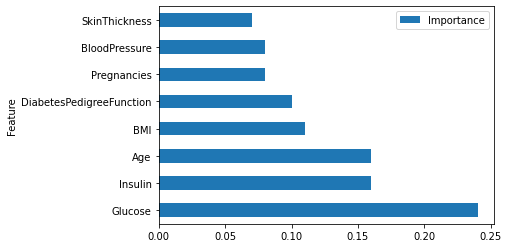

In [ ]:
import matplotlib.pyplot as plt
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(df2, round(importance, 2)) for df2, importance in zip(df1_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

feature_importance = pd.DataFrame(feature_importances, columns =['Feature', 'Importance'])
ax = feature_importance.plot.barh(x='Feature', y='Importance')
plt.show()